In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/dsp/Dataset.csv'

In [3]:
import pandas as pd
df = pd.read_csv(path)
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

Goal:
To find which type of Genre of Games are preferred in which type of Platforms

In [4]:
# Data cleaning

In [9]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [13]:
# How many Games are released by the Platforms in the Following Years

In [14]:
import matplotlib.pyplot as plt

<ipython-input-15-77caf160952d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_platform_year = df.groupby(['Year_of_Release', 'Platform']).sum()['Global_Sales'].unstack()


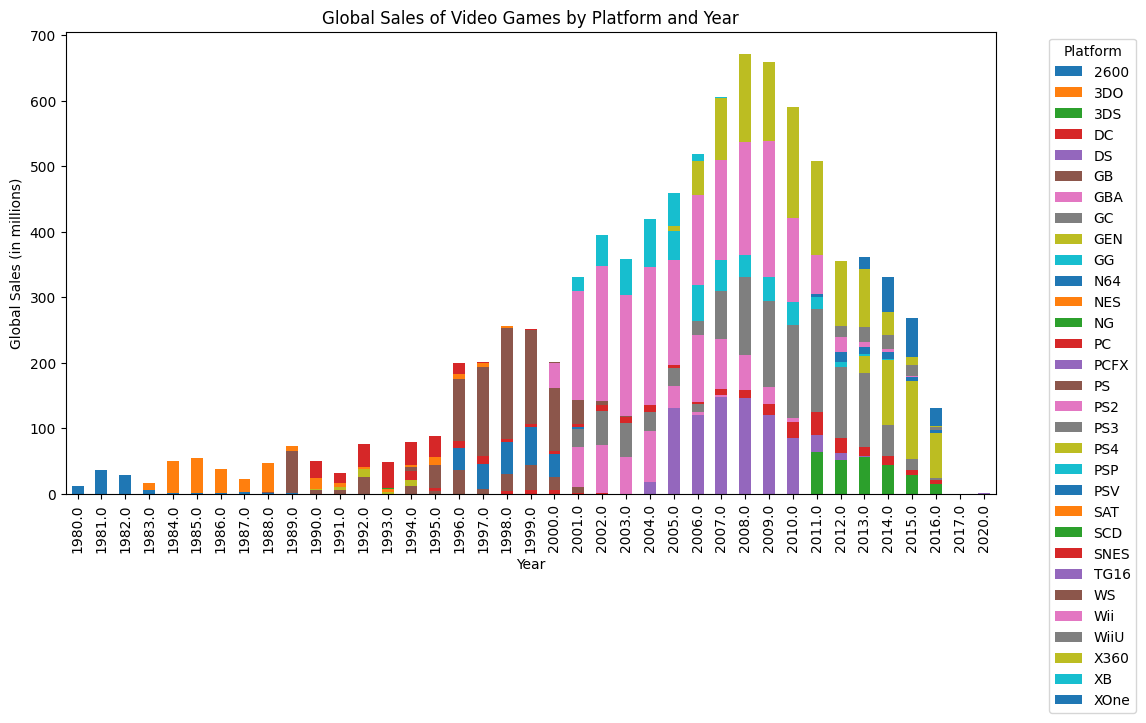

In [15]:
# Group the data by 'Year_of_Release' and 'Platform', summing the sales for each combination
sales_by_platform_year = df.groupby(['Year_of_Release', 'Platform']).sum()['Global_Sales'].unstack()

# Plotting
sales_by_platform_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Global Sales of Video Games by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [16]:
# Group the data by 'Year_of_Release' and 'Developer', summing the sales for each combination
sales_by_developer_year = df.groupby(['Year_of_Release', 'Developer']).sum()['Global_Sales'].unstack()

# Plotting
sales_by_developer_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Global Sales of Video Games by Developer and Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


<ipython-input-16-2928b0e5960e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_developer_year = df.groupby(['Year_of_Release', 'Developer']).sum()['Global_Sales'].unstack()


<ipython-input-17-7b9bd689bb6f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_genre = df.groupby('Genre').sum()['Global_Sales'].sort_values(ascending=False)


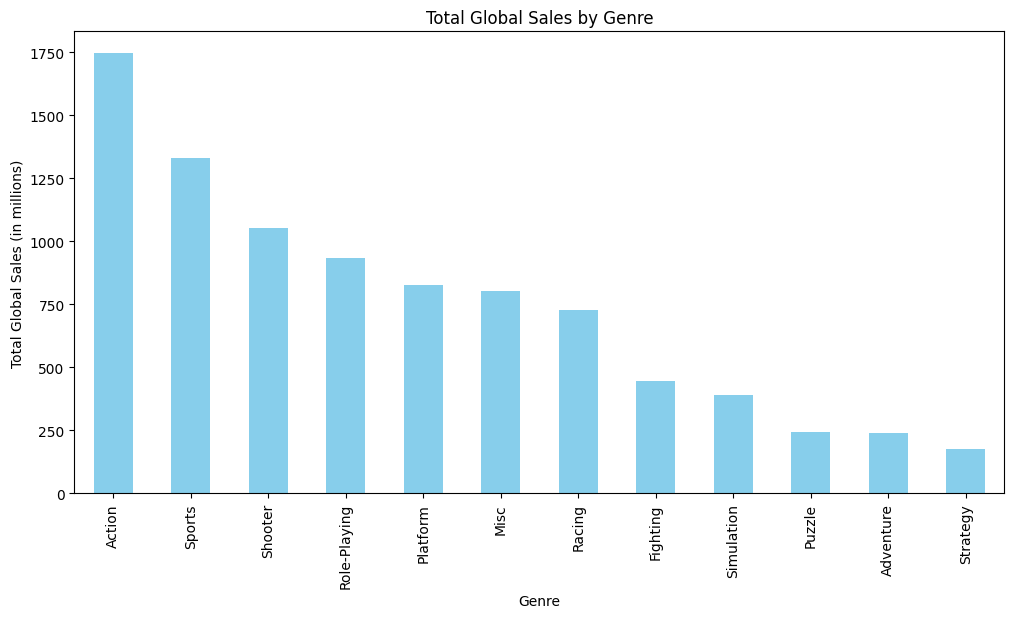

In [17]:
sales_by_genre = df.groupby('Genre').sum()['Global_Sales'].sort_values(ascending=False)

# Plotting
sales_by_genre.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')

# Show the plot
plt.show()


<ipython-input-19-676107bc65a1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_genre_region = df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales']]


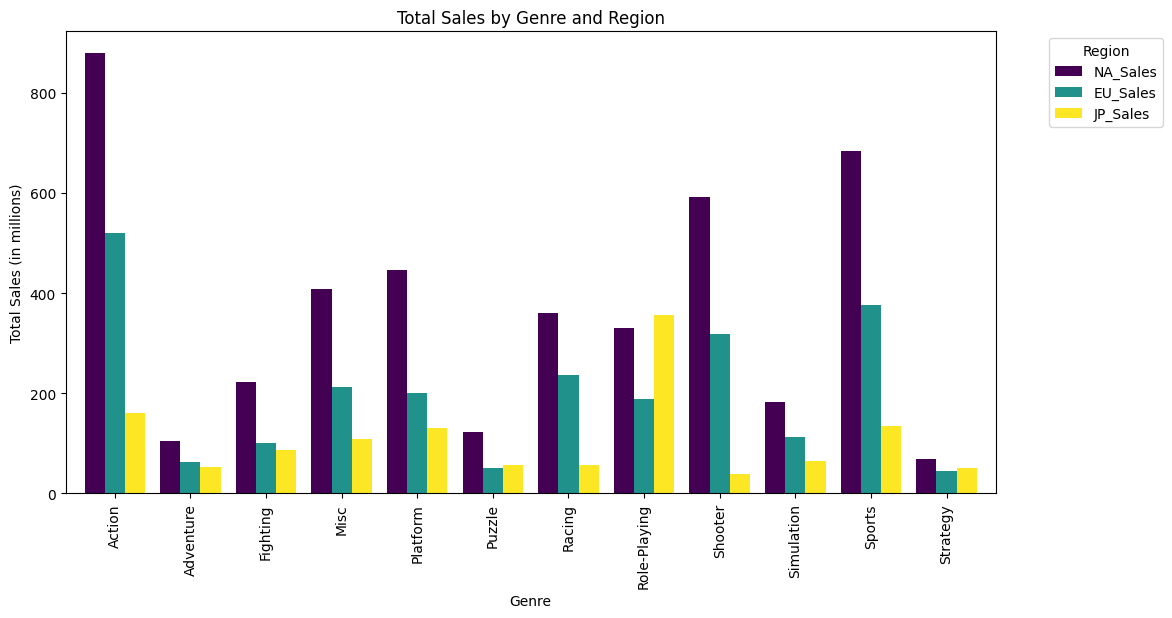

In [19]:
# Group the data by 'Genre' and sum the sales for each region
sales_by_genre_region = df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales']]

# Plotting
sales_by_genre_region.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='viridis')
plt.title('Total Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

<ipython-input-20-050d5427c4fa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_region_year = df.groupby('Year_of_Release').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales']]


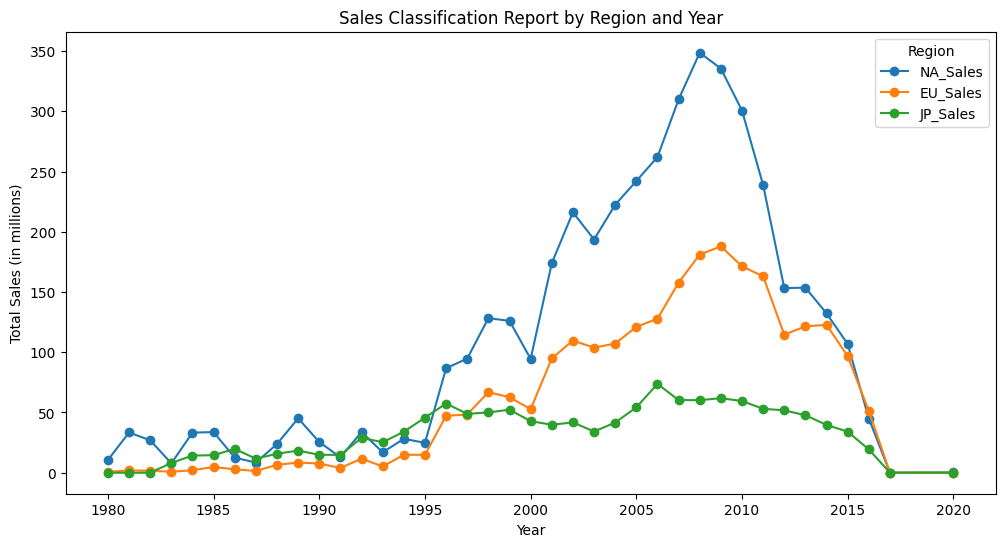

In [20]:
# Group the data by 'Year_of_Release' and sum the sales for each region
sales_by_region_year = df.groupby('Year_of_Release').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales']]

# Plotting
sales_by_region_year.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Sales Classification Report by Region and Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region')

# Show the plot
plt.show()


In [21]:
import seaborn as sns

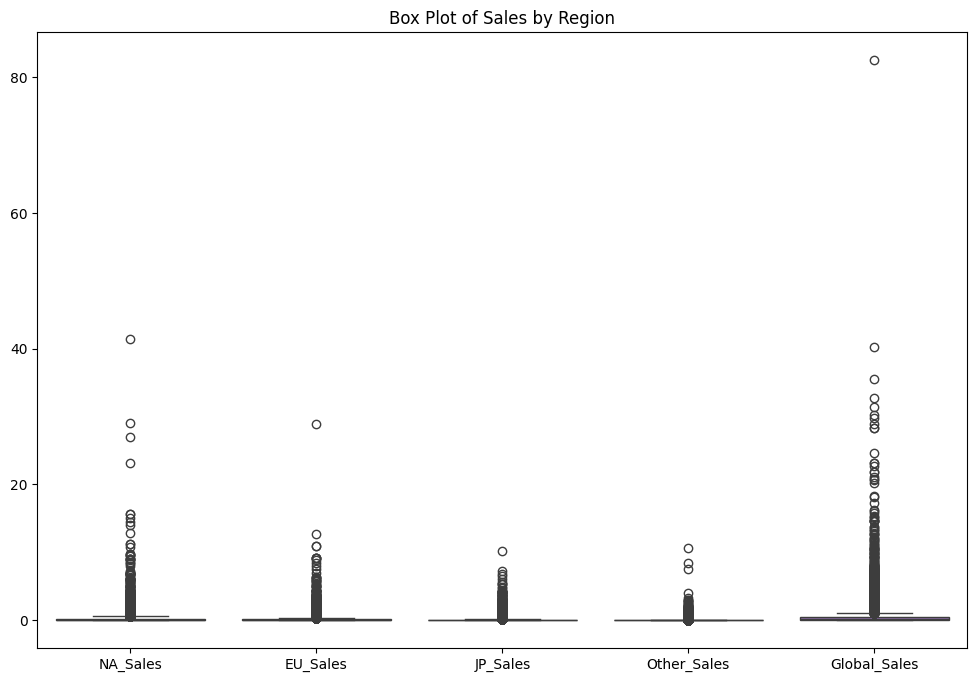

In [23]:
# Select relevant numerical columns for box plot
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[sales_columns])
plt.title('Box Plot of Sales by Region')
plt.show()


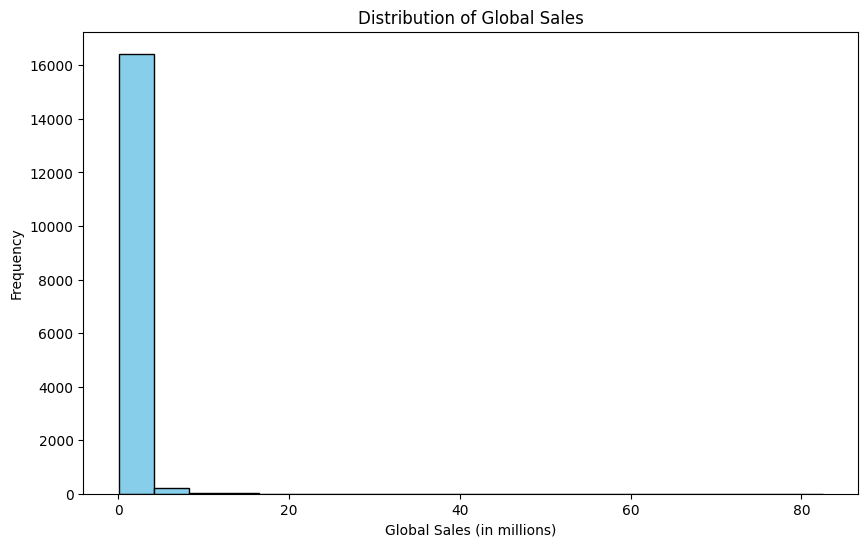

In [24]:
# Create a histogram for a specific column, e.g., 'Global_Sales'
plt.figure(figsize=(10, 6))
plt.hist(df['Global_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()


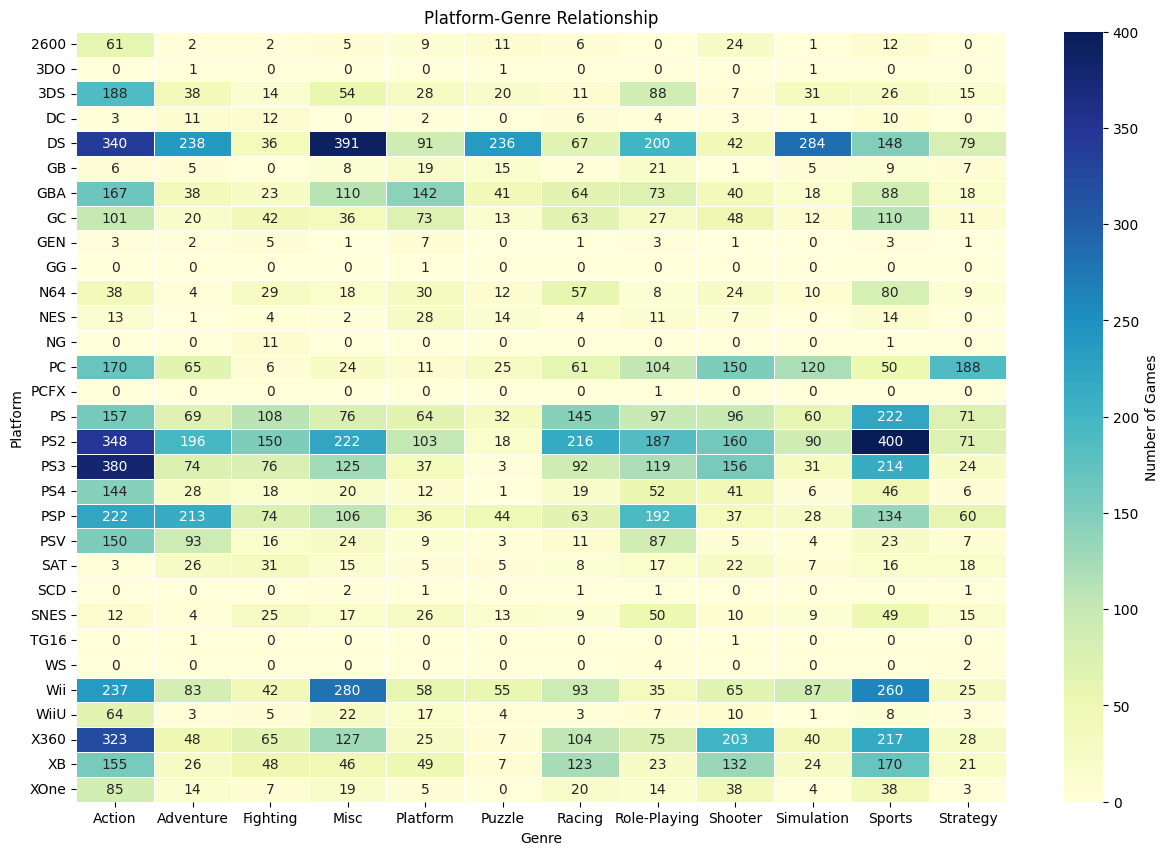

In [25]:
# Create a cross-tabulation (contingency table) of Platform and Genre
platform_genre_cross = pd.crosstab(df['Platform'], df['Genre'])

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(platform_genre_cross, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Number of Games'})
plt.title('Platform-Genre Relationship')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()


<ipython-input-26-2ce956c2aa32>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=most_played_genre_by_platform, ci=None, palette='viridis')


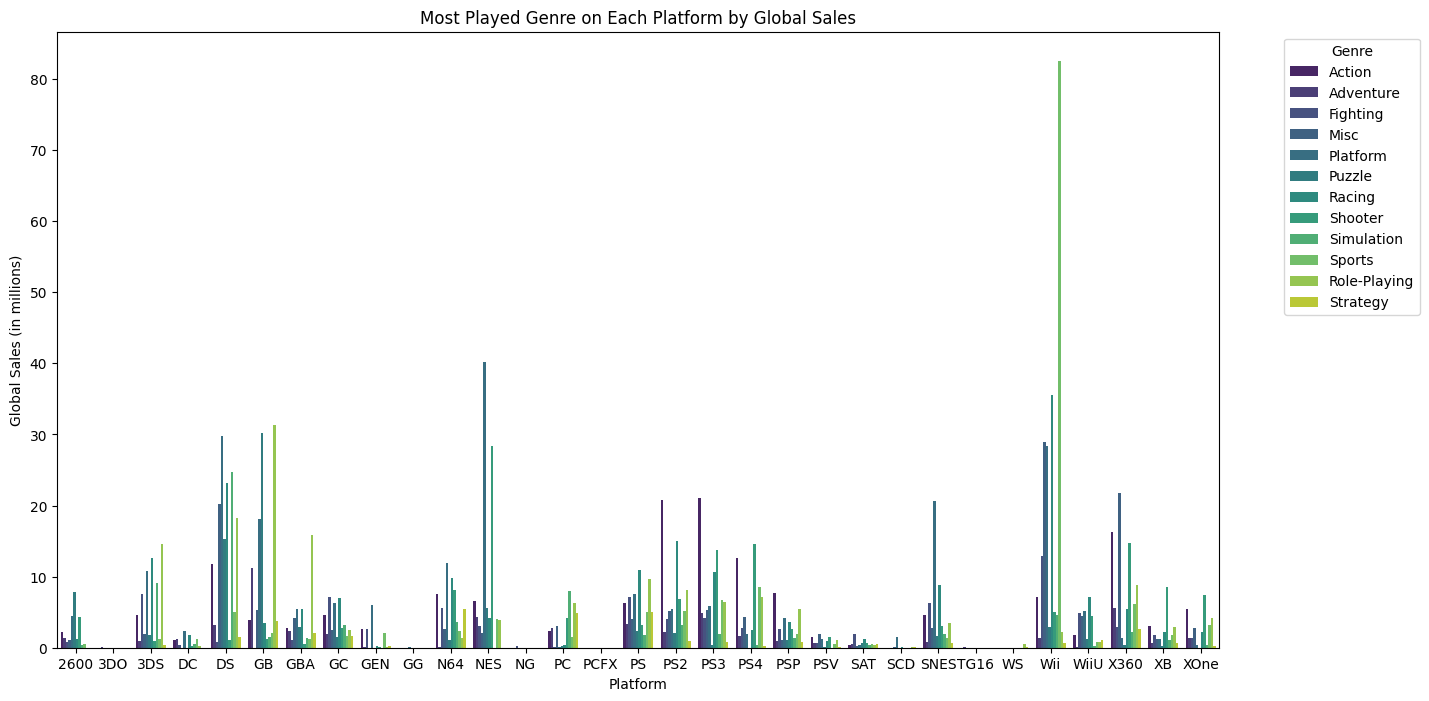

In [26]:
# Group the data by 'Platform' and 'Genre', and find the genre with the highest global sales for each platform
most_played_genre_by_platform = df.groupby(['Platform', 'Genre']).agg({'Global_Sales': 'max'}).reset_index()

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=most_played_genre_by_platform, ci=None, palette='viridis')
plt.title('Most Played Genre on Each Platform by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-30-4dd03fc96a70>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Sales', hue='Genre', data=melted_df, ci=None, palette='viridis')


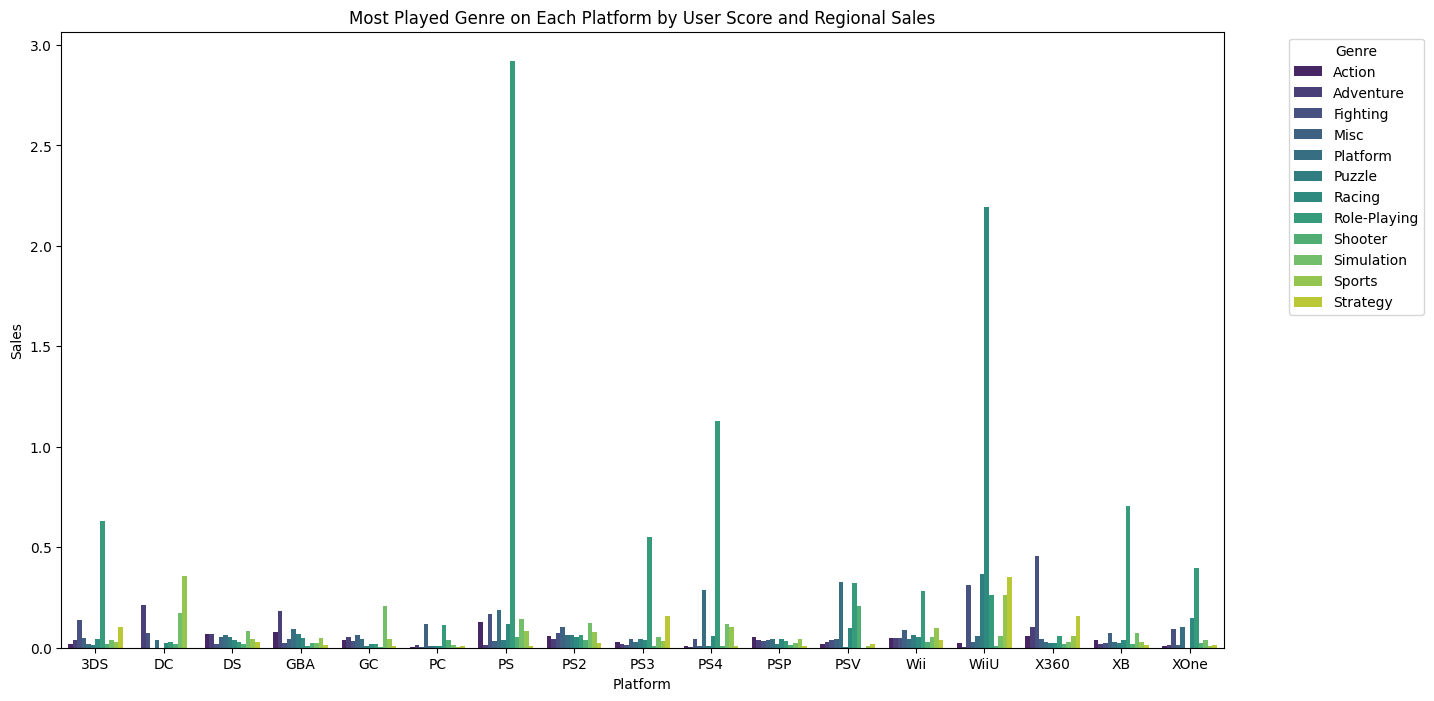

In [30]:
# Select relevant columns
columns_of_interest = ['Platform', 'Genre', 'User_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales']

# Filter out rows with missing user scores
df_filtered = df[columns_of_interest].dropna(subset=['User_Score'])

# Find the genre with the highest user score for each platform
most_played_genre_by_platform = df_filtered.groupby(['Platform', 'Genre']).agg({'User_Score': 'max'}).reset_index()

# Merge with the original dataset to get corresponding regional sales data
most_played_genre_by_platform = pd.merge(most_played_genre_by_platform, df[columns_of_interest], on=['Platform', 'Genre', 'User_Score'], how='left')

# Melt the dataframe for easier plotting
melted_df = pd.melt(most_played_genre_by_platform, id_vars=['Platform', 'Genre', 'User_Score'], var_name='Region', value_name='Sales')

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Sales', hue='Genre', data=melted_df, ci=None, palette='viridis')
plt.title('Most Played Genre on Each Platform by User Score and Regional Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-31-abc445a679c2>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='User_Score', hue='Genre', data=most_played_genre_by_platform, ci=None, palette='viridis')


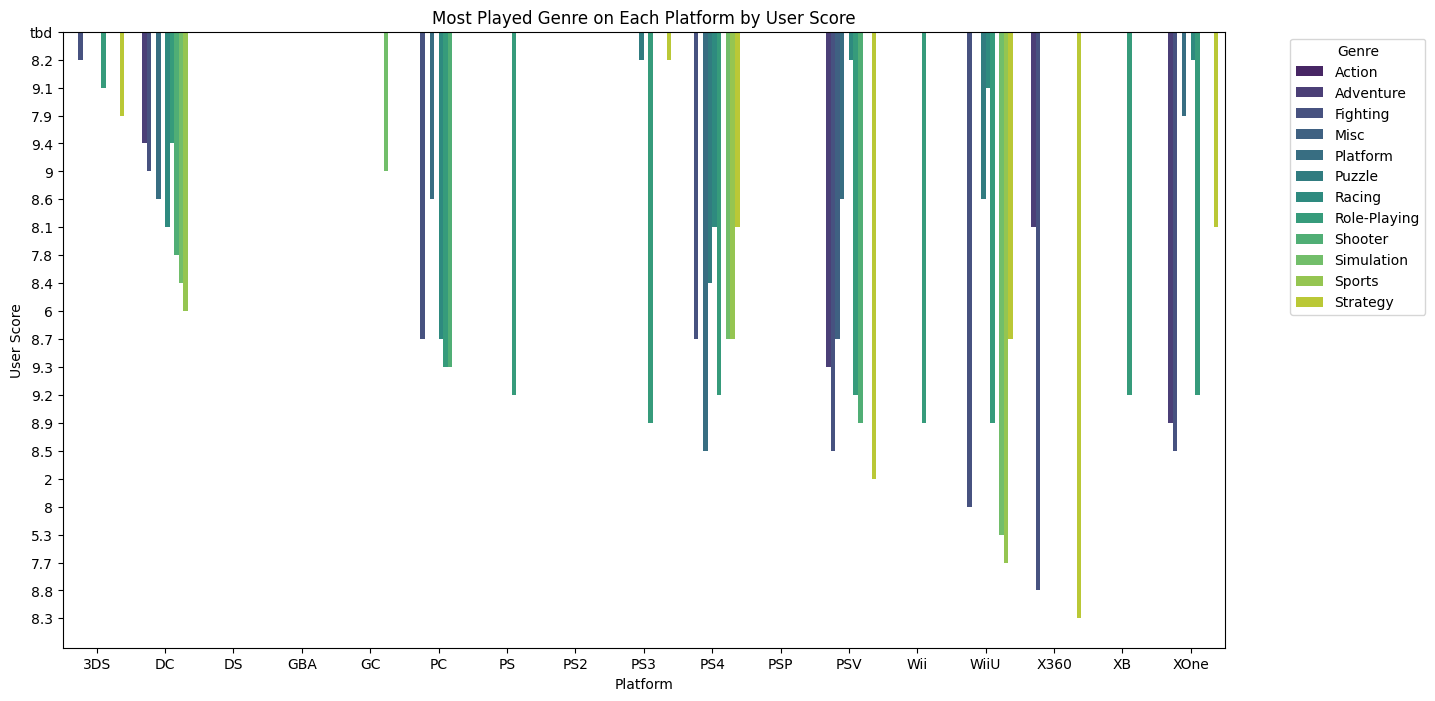

In [31]:
# Select relevant columns
columns_of_interest = ['Platform', 'Genre', 'User_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales']

# Filter out rows with missing user scores
df_filtered = df[columns_of_interest].dropna(subset=['User_Score'])

# Find the genre with the highest user score for each platform
most_played_genre_by_platform = df_filtered.groupby(['Platform', 'Genre']).agg({'User_Score': 'max'}).reset_index()

# Merge with the original dataset to get corresponding regional sales data
most_played_genre_by_platform = pd.merge(most_played_genre_by_platform, df[columns_of_interest], on=['Platform', 'Genre', 'User_Score'], how='left')

# Melt the dataframe for easier plotting
melted_df = pd.melt(most_played_genre_by_platform, id_vars=['Platform', 'Genre', 'User_Score'], var_name='Region', value_name='Sales')

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='User_Score', hue='Genre', data=most_played_genre_by_platform, ci=None, palette='viridis')
plt.title('Most Played Genre on Each Platform by User Score')
plt.xlabel('Platform')
plt.ylabel('User Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-33-3ab1a6dc6bc3>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', hue='Name', data=melted_df, ci=None, palette='viridis')


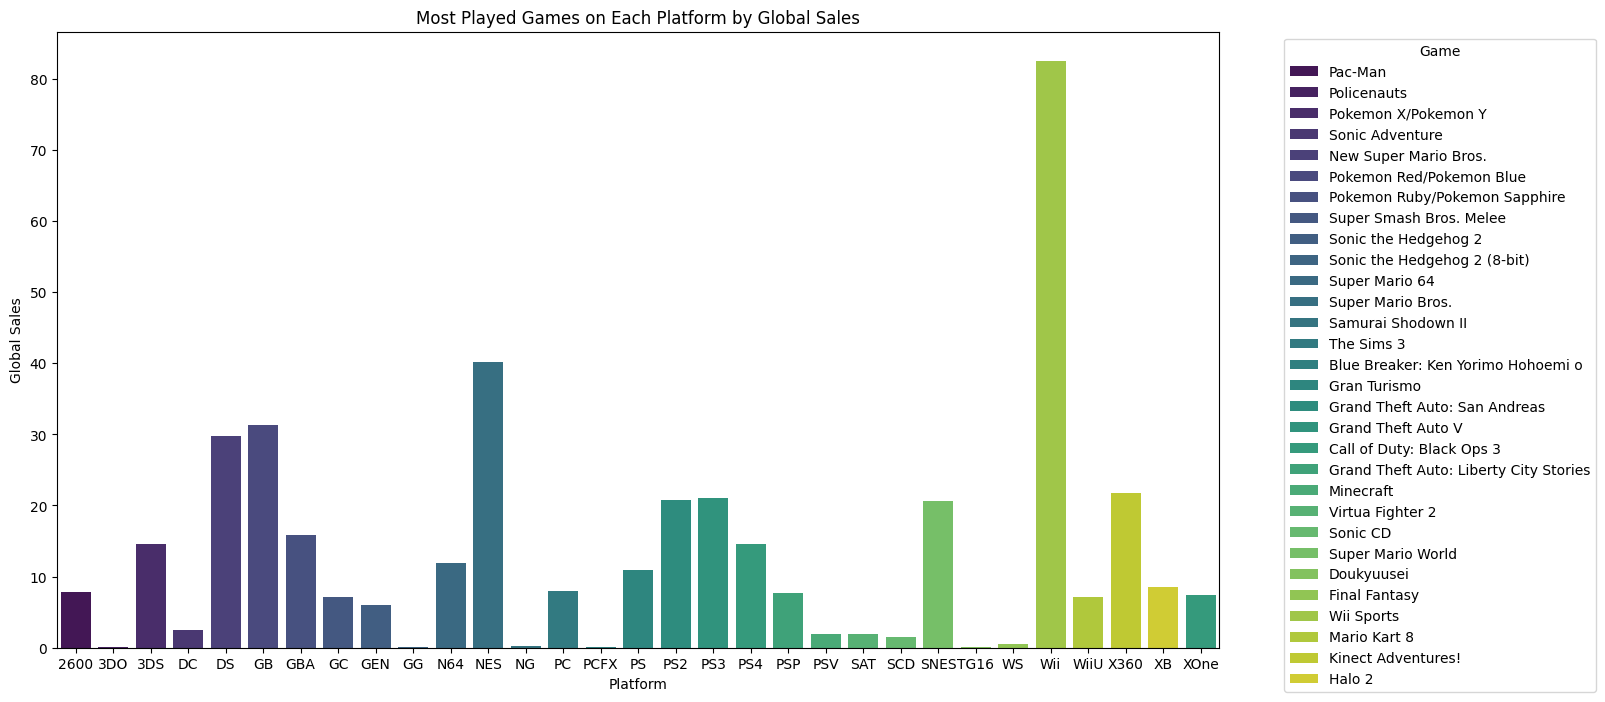

In [33]:
# Select relevant columns
columns_of_interest = ['Platform', 'Name', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']

# Filter out rows with missing global sales
df_filtered = df[columns_of_interest].dropna(subset=['Global_Sales'])

# Find the game with the highest global sales for each platform
most_played_game_by_platform = df_filtered.groupby(['Platform']).apply(lambda x: x.loc[x['Global_Sales'].idxmax()]).reset_index(drop=True)

# Melt the dataframe for easier plotting
melted_df = pd.melt(most_played_game_by_platform, id_vars=['Platform', 'Name', 'Global_Sales'], var_name='Region', value_name='Sales')

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Global_Sales', hue='Name', data=melted_df, ci=None, palette='viridis')
plt.title('Most Played Games on Each Platform by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-36-b187505356b6>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')


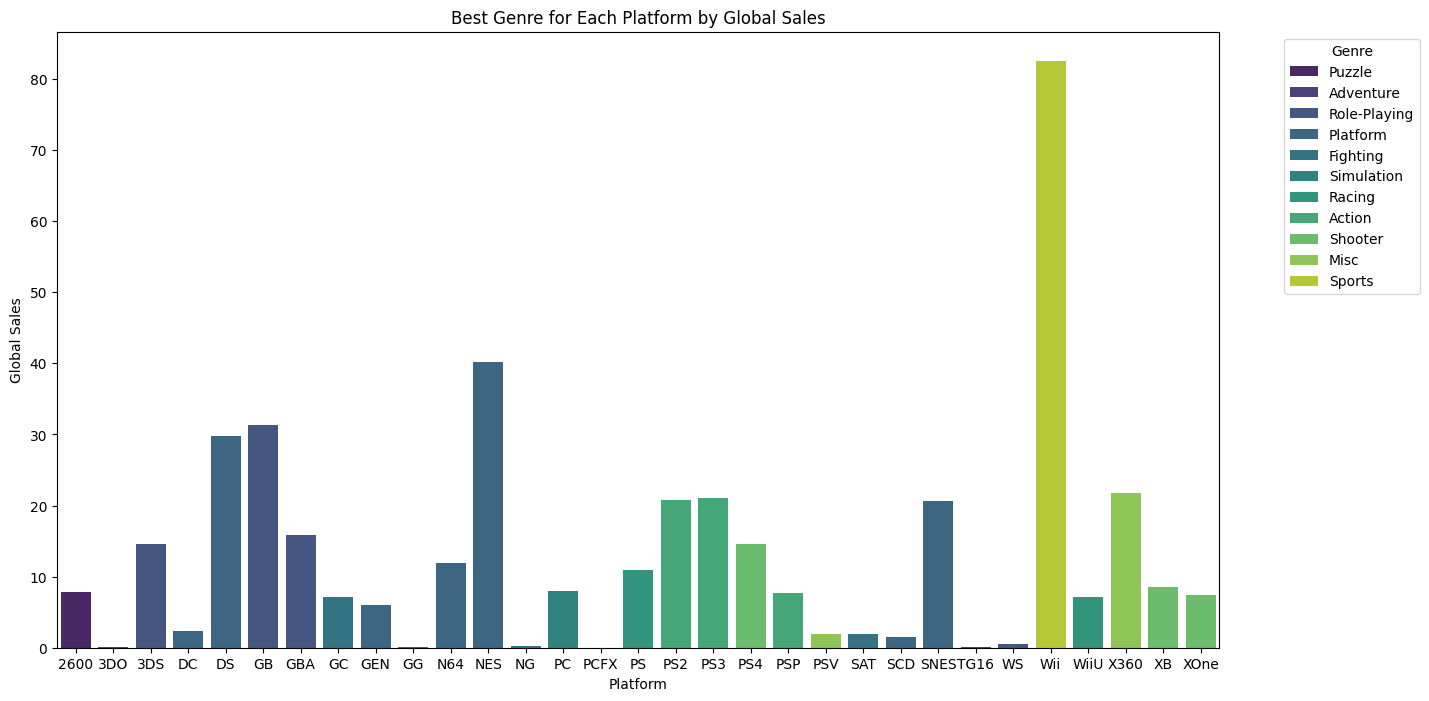

In [36]:
# Select relevant columns
columns_of_interest = ['Platform', 'Genre', 'Global_Sales']

# Filter out rows with missing global sales
df_filtered = df[columns_of_interest].dropna(subset=['Global_Sales'])

# Find the genre with the highest global sales for each platform
best_genre_by_platform = df_filtered.groupby('Platform').apply(lambda x: x.loc[x['Global_Sales'].idxmax()]).reset_index(drop=True)

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')
plt.title('Best Genre for Each Platform by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-40-9764451a1e91>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='NA_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')


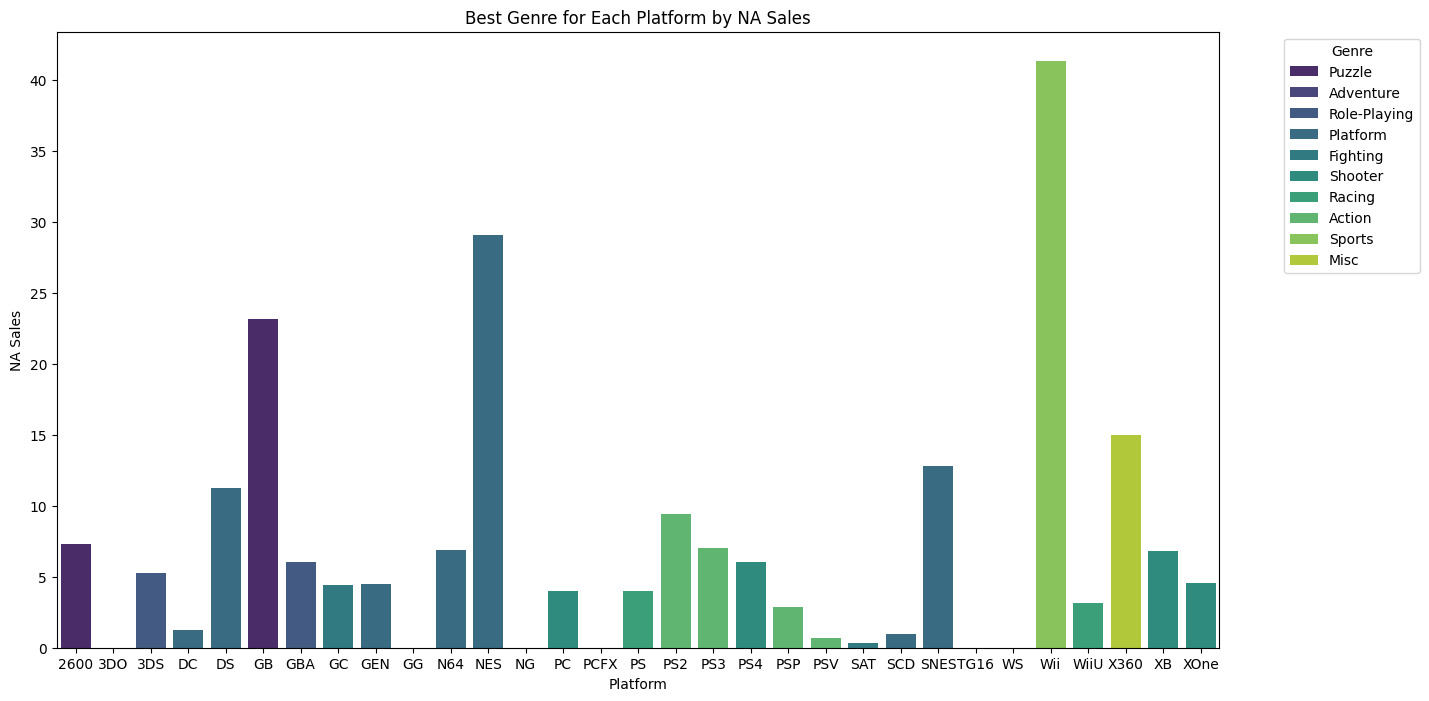

In [40]:
# Select relevant columns
columns_of_interest = ['Platform', 'Genre', 'NA_Sales']

# Filter out rows with missing global sales
df_filtered = df[columns_of_interest].dropna(subset=['NA_Sales'])

# Find the genre with the highest global sales for each platform
best_genre_by_platform = df_filtered.groupby('Platform').apply(lambda x: x.loc[x['NA_Sales'].idxmax()]).reset_index(drop=True)

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='NA_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')
plt.title('Best Genre for Each Platform by NA Sales')
plt.xlabel('Platform')
plt.ylabel('NA Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-41-fc86649635cf>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='EU_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')


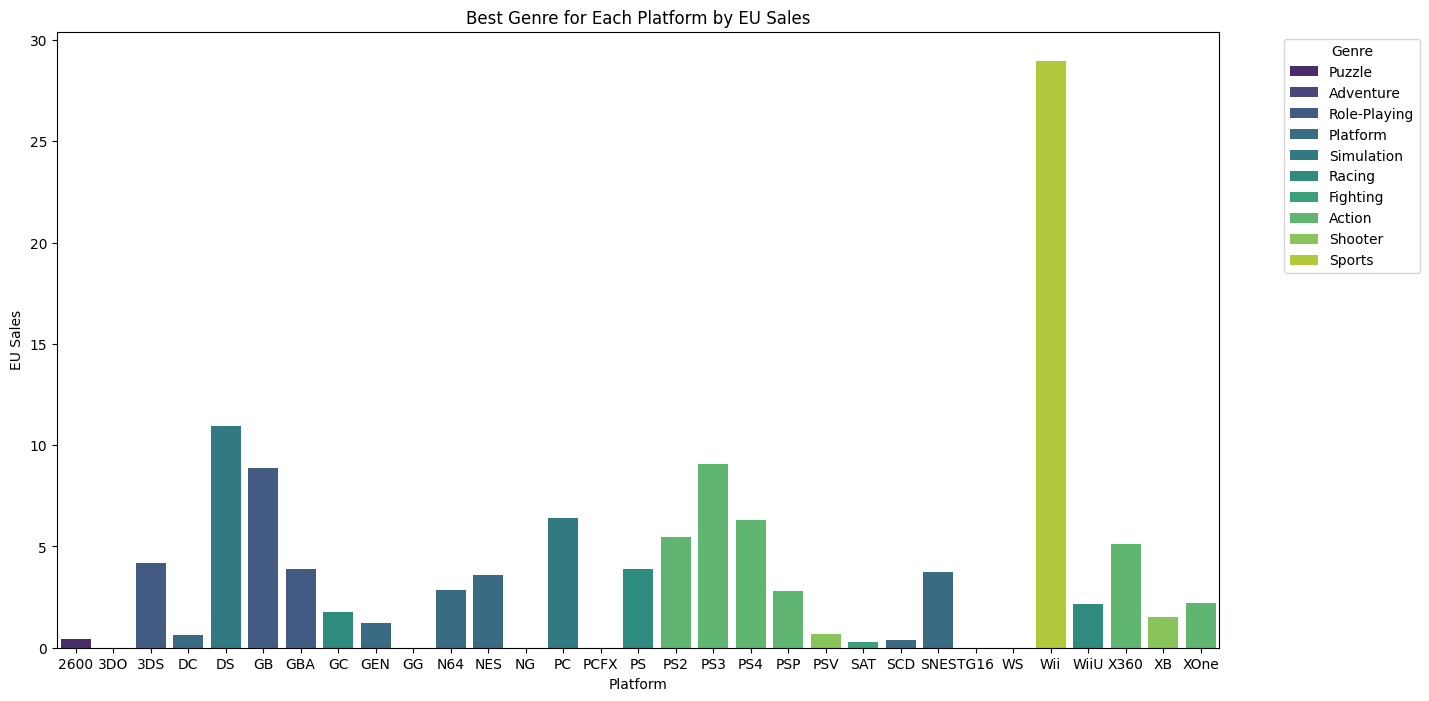

In [41]:
# Select relevant columns
columns_of_interest = ['Platform', 'Genre', 'EU_Sales']

# Filter out rows with missing EU sales
df_filtered = df[columns_of_interest].dropna(subset=['EU_Sales'])

# Find the genre with the highest EU sales for each platform
best_genre_by_platform = df_filtered.groupby('Platform').apply(lambda x: x.loc[x['EU_Sales'].idxmax()]).reset_index(drop=True)

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='EU_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')
plt.title('Best Genre for Each Platform by EU Sales')
plt.xlabel('Platform')
plt.ylabel('EU Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-42-f19e910c690e>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='JP_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')


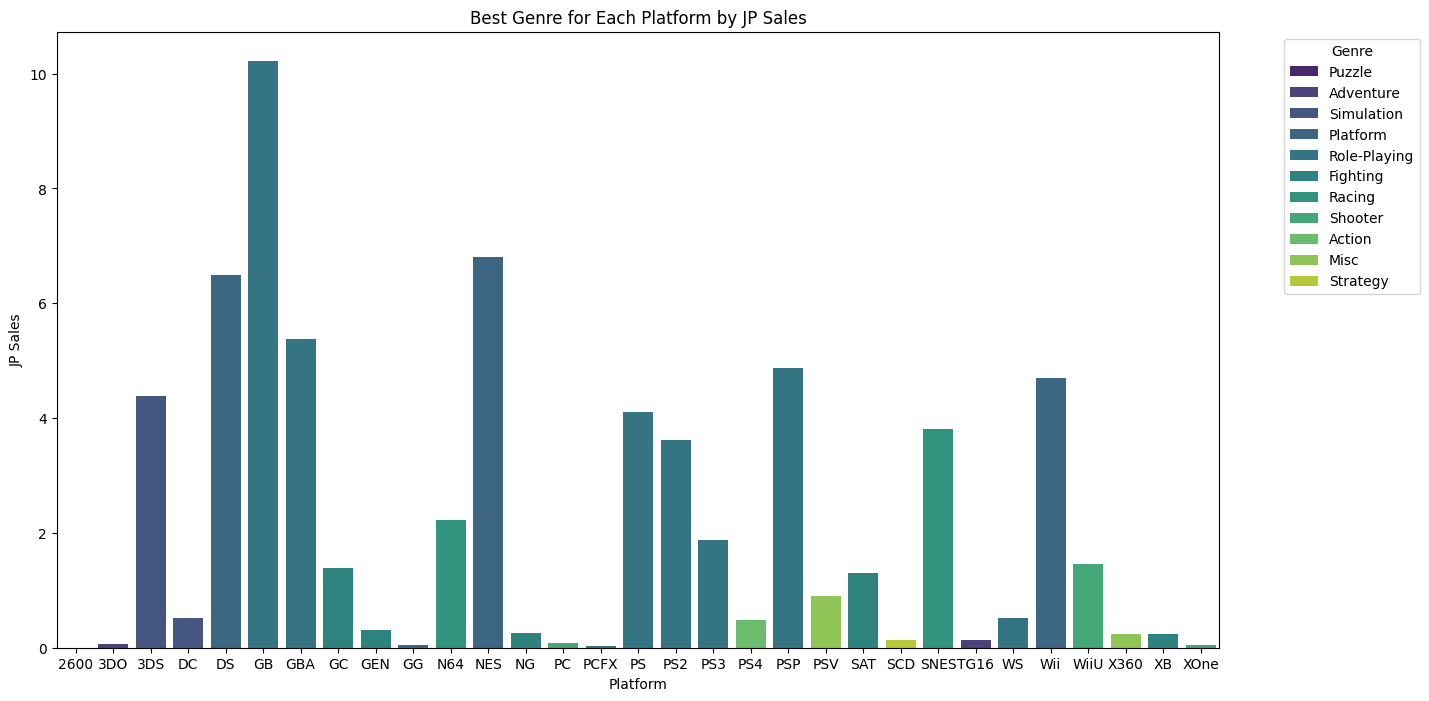

In [42]:
# Select relevant columns
columns_of_interest = ['Platform', 'Genre', 'JP_Sales']

# Filter out rows with missing JP sales
df_filtered = df[columns_of_interest].dropna(subset=['JP_Sales'])

# Find the genre with the highest JP sales for each platform
best_genre_by_platform = df_filtered.groupby('Platform').apply(lambda x: x.loc[x['JP_Sales'].idxmax()]).reset_index(drop=True)

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='JP_Sales', hue='Genre', data=best_genre_by_platform, ci=None, palette='viridis')
plt.title('Best Genre for Each Platform by JP Sales')
plt.xlabel('Platform')
plt.ylabel('JP Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
